# COMP3850 - FX analysis

In [1]:
#data manipulation libraries
import pandas as pd
import numpy as np 

#data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import autocorrelation_plot

#stat models libraries 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller#for augmented Dickey-Fuller test
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


#sklearn predictive modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#technical analysis libaries
import talib as ta # Used to perform Technical analysis of financial market data

#others libraries 
import math
import datetime

## Data Extraction

Extracting the given FX csv files and storing them within dataframes via Jupiter notebook

In [ ]:
#developed this function to grab specific FX pairing datasets (1st month at the moment) and store and combine the files into one dataframe per FX pairing
def extract_data(curr):
    data_list =[]
    for n in range(1,25):
        if(len(str(n)) == 1):
            if(n == 5):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-2020060{n}T000000_2020060{n}T205959.csv")
            elif(n not in [6,7]):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-2020060{n}T000000_2020060{n}T235959.csv")
            else:
                pass
        data_list.append(dat)
        if(n in [12,19,26]):
            dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-202006{n}T000000_202006{n}T205959.csv")
        elif(len(str(n)) == 2):
            if(n not in [13,14,20,21,27,28]):
                dat = pd.read_csv(f"FX/202006/bar_Forex_{curr}-202006{n}T000000_202006{n}T235959.csv")
    return pd.concat(data_list) 

In [ ]:
#Might be useful for later (a list for each catergory) #not important at the moment
AUD_USD = 'AUDUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_AUD = 'EURAUD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_GBP = 'EURGBP'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
EUR_USD = 'EURUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]
GBP_USD = 'GBPUSD'#, range(1,25), 5, [6,7], [12,19,26], [13,14,29,21,27,28]]

In [ ]:
#storing each dataframe with the function
dfaudusd = extract_data('AUDUSD')
dfeuraud = extract_data('EURAUD')
dfeurgbp = extract_data('EURGBP')
dfeurusd = extract_data('EURUSD')
dfgbpusd = extract_data('GBPUSD')
#display the 1st five records of the AUD-USD FX Pairing
dfaudusd.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,0.66582,0.66583,0.66581,0.66582,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,0.66582,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66586,0.66586,0.66584,0.66584,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,0.66581,0.66582,0.66581,0.66581,-1,-1.0,-1,0.66584,0.66586,0.66584,0.66586,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,0.66581,0.66582,0.66581,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,0.66582,0.66582,0.66582,0.66582,-1,-1.0,-1,0.66586,0.66586,0.66586,0.66586,-1,-1.0,-1


In [ ]:
#display the 1st five records of the EUR-AUD FX Pairing
dfeuraud.head()

,date,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
0,2020-06-01 00:00:00+00:00,1.66942,1.66945,1.66935,1.66936,-1,-1.0,-1,1.66949,1.66952,1.66943,1.66943,-1,-1.0,-1
1,2020-06-01 00:00:01+00:00,1.66936,1.66941,1.66936,1.66940,-1,-1.0,-1,1.66943,1.66947,1.66943,1.66945,-1,-1.0,-1
2,2020-06-01 00:00:02+00:00,1.66940,1.66941,1.66937,1.66937,-1,-1.0,-1,1.66945,1.66945,1.66945,1.66945,-1,-1.0,-1
3,2020-06-01 00:00:03+00:00,1.66937,1.66937,1.66937,1.66937,-1,-1.0,-1,1.66945,1.66945,1.66945,1.66945,-1,-1.0,-1
4,2020-06-01 00:00:04+00:00,1.66937,1.66937,1.66937,1.66937,-1,-1.0,-1,1.66945,1.66945,1.66945,1.66945,-1,-1.0,-1


## Data Preparation

In [ ]:
#Determining the size of each dataframe (number of records, number of columns)
print(dfaudusd.shape, dfeuraud.shape, dfeurgbp.shape, dfeurusd.shape, dfgbpusd.shape)

(1962900, 15) (1962900, 15) (1962900, 15) (1962900, 15) (1962900, 15)


In [ ]:
#display the datatypes of each column
dfaudusd.info()
# dfeuraud.info()
# dfeurgbp.info()
# dfeurusd.info()
# dfgbpusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962900 entries, 0 to 85499
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   bid_open      float64
 2   bid_high      float64
 3   bid_low       float64
 4   bid_close     float64
 5   bid_volume    int64  
 6   bid_average   float64
 7   bid_barCount  int64  
 8   ask_open      float64
 9   ask_high      float64
 10  ask_low       float64
 11  ask_close     float64
 12  ask_volume    int64  
 13  ask_average   float64
 14  ask_barCount  int64  
dtypes: float64(10), int64(4), object(1)
memory usage: 239.6+ MB


In [ ]:
#display descriptive statistics on AUD-USD pairings
dfaudusd.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0
mean,0.690,0.690,0.690,0.690,-1.0,-1.0,-1.0,0.690,0.690,0.690,0.690,-1.0,-1.0,-1.0
std,0.006,0.006,0.006,0.006,0.0,0.0,0.0,0.006,0.006,0.006,0.006,0.0,0.0,0.0
min,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0,0.666,0.666,0.666,0.666,-1.0,-1.0,-1.0
25%,0.686,0.686,0.686,0.686,-1.0,-1.0,-1.0,0.686,0.686,0.686,0.686,-1.0,-1.0,-1.0
50%,0.690,0.690,0.690,0.690,-1.0,-1.0,-1.0,0.690,0.690,0.690,0.690,-1.0,-1.0,-1.0
75%,0.696,0.696,0.696,0.696,-1.0,-1.0,-1.0,0.696,0.696,0.696,0.696,-1.0,-1.0,-1.0
max,0.706,0.706,0.706,0.706,-1.0,-1.0,-1.0,0.706,0.706,0.706,0.706,-1.0,-1.0,-1.0


In [ ]:
dfeuraud.describe().round(3)

,bid_open,bid_high,bid_low,bid_close,bid_volume,bid_average,bid_barCount,ask_open,ask_high,ask_low,ask_close,ask_volume,ask_average,ask_barCount
count,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0,1962900.000,1962900.000,1962900.000,1962900.000,1962900.0,1962900.0,1962900.0
mean,1.632,1.632,1.632,1.632,-1.0,-1.0,-1.0,1.632,1.632,1.632,1.632,-1.0,-1.0,-1.0
std,0.010,0.010,0.010,0.010,0.0,0.0,0.0,0.010,0.010,0.010,0.010,0.0,0.0,0.0
min,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0,1.603,1.603,1.603,1.603,-1.0,-1.0,-1.0
25%,1.626,1.626,1.626,1.626,-1.0,-1.0,-1.0,1.626,1.626,1.626,1.626,-1.0,-1.0,-1.0
50%,1.631,1.631,1.631,1.631,-1.0,-1.0,-1.0,1.631,1.631,1.631,1.631,-1.0,-1.0,-1.0
75%,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0,1.638,1.638,1.638,1.638,-1.0,-1.0,-1.0
max,1.669,1.669,1.669,1.669,-1.0,-1.0,-1.0,1.669,1.670,1.669,1.669,-1.0,-1.0,-1.0


In [ ]:
#checking for nulls and the sum
print(f'Are there any null values in AUDUSD? {dfaudusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfaudusd.isnull().sum()}')
print(f'Are there any null values in EUROAUD? {dfeuraud.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeuraud.isnull().sum()}')
print(f'Are there any null values in EUROGBP? {dfeurgbp.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurgbp.isnull().sum()}')
print(f'Are there any null values EURUSD? {dfeurusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfeurusd.isnull().sum()}')
print(f'Are there any null values GBPUSD? {dfgbpusd.isnull().values.any()}')
# print(f'Which fields have null values:\n{dfgbpusd.isnull().sum()}')

Are there any null values in AUDUSD? False
Are there any null values in EUROAUD? False
Are there any null values in EUROGBP? False
Are there any null values EURUSD? False
Are there any null values GBPUSD? False


### Extracting particular times of the day

In [11]:
dfs= [dfaudusd, dfeuraud, dfeurgbp, dfeurusd, dfgbpusd]
for i in range(len(dfs)):
    dfs[i][['Date', 'Time']] = dfs[i]['date'].str.split(' ', expand=True)
    dfs[i][['Time', 'Useless']]  = dfs[i]['Time'].str.split('+', expand=True)
dfaudusd.head()



KeyboardInterrupt: 

In [ ]:
#check updated datatypes
dfaudusd.dtypes
# dfeuraud.dtypes
# dfeurgbp.dtypes
# dfeurusd.dtypes
# dfgbpusd.dtypes

In [ ]:
x = dfeurusd['Date']
y = dfeurusd['bid_open']
plt.plot(x,y)
plt.show()

### Splitting the date field into th

In [ ]:

dfaudusdse = dfaudusd[(dfaudusd['Time'].str.contains('10:00:00')) | (dfaudusd['Time'].str.contains('16:00:00'))]
dfaudusdse.head()
dfeuraudse = dfeuraud[(dfeuraud['Time'].str.contains('10:00:00')) | (dfeuraud['Time'].str.contains('16:00:00'))]
# dfeuraudse.head()
dfeurgbpse = dfeurgbp[(dfeurgbp['Time'].str.contains('10:00:00')) | (dfeurgbp['Time'].str.contains('16:00:00'))]
# dfeurgbpse.head()
dfeurusdse = dfeurusd[(dfeurusd['Time'].str.contains('10:00:00')) | (dfeurusd['Time'].str.contains('16:00:00'))]
# dfeurusdse.head()
dfgbpusdse = dfgbpusd[(dfgbpusd['Time'].str.contains('10:00:00')) | (dfgbpusd['Time'].str.contains('16:00:00'))]
# dfgbpusdse.head()

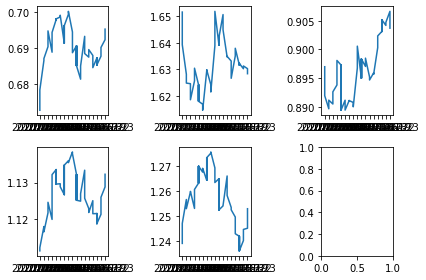

In [ ]:
figure, axis = plt.subplots(2,3)

x = dfaudusdse['Date']
y = dfaudusdse['bid_open']
axis[0,0].plot(x,y)
# axis[0,0].xlabel('Date (Month 1')
# axis[0,0].ylabel('Price (AUD-USD)')
# axis[0,0].title('AUD-USD Bid Open')

x = dfeuraudse['Date']
y = dfeuraudse['bid_open']
axis[0,1].plot(x,y)
# axis[0,1].xlabel('Date (Month 1)')
# axis[0,1].ylabel('Price (EURO-AUD)')
# axis[0,1].title('EUR-AUD Bid Open')

x = dfeurgbpse['Date']
y = dfeurgbpse['bid_open']
axis[0,2].plot(x,y)
# axis[0,2].xlabel('Date (Month 1)')
# axis[0,2].ylabel('Price (EURO-GBP)')
# axis[0,2].title('EUR-GBP Bid Open')

x = dfeurusdse['Date']
y = dfeurusdse['bid_open']
axis[1,0].plot(x,y)
# axis[1,0].xlabel('Date (Month 1)')
# axis[1,0].ylabel('Price (EUROUSD)')
# axis[1,0].title('EUR-USD Bid Open')

x = dfgbpusdse['Date']
y = dfgbpusdse['bid_open']
axis[1,1].plot(x,y)
# axis[2,0].xlabel('Date (Month 1)')
# axis[2,0].ylabel('Price (GBPUSD)')
# axis[2,0].title('GBP-USD Bid Open')
figure.tight_layout()
plt.show()

In [ ]:
x = dfeurusdse['date']
y = dfeurusdse['bid_open']
plt.plot(x,y)
plt.show()

## Determine if stationary

In [ ]:
x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']


In [ ]:
#rolling mean and std plot
figure, axis = plt.subplots(nrows=5, ncols=3)
ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14= axis.flatten()
x = dfaudusdse['bid_open']
y = dfaudusdse['ask_open']
ax0.hist(x)
ax1.boxplot(x)
ax2.scatter(x,y)

x = dfeuraudse['bid_open']
y = dfeuraudse['ask_open']
ax3.hist(x)
ax4.boxplot(x)
ax5.scatter(x,y)

x = dfeurgbpse['bid_open']
y = dfeurgbpse['ask_open']
ax6.hist(x)
ax7.boxplot(x)
ax8.scatter(x,y)

x = dfeurusdse['bid_open']
y = dfeurusdse['ask_open']
ax9.hist(x)
ax10.boxplot(x)
ax11.scatter(x,y)

x = dfgbpusdse['bid_open']
y = dfgbpusdse['ask_open']
ax12.hist(x)
ax13.boxplot(x)
ax14.scatter(x,y)

figure.tight_layout()
plt.show()


In [ ]:
df_open = dfeurusdse[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

In [ ]:
autocorrelation_plot(df_open)

In [ ]:
dfeurusd_day = dfeurusd[dfeurusd['date'].str.contains('2020-06-01')]
dfeurusd_day.head()


In [ ]:
# x = dfeurusd_day['date']
# y = dfeurusd_day['bid_open']
# plt.plot(x,y)
# plt.show()

In [ ]:
# df_openw = dfeurusd_day[['date', 'bid_open']]
# df_openw['date'] = pd.to_datetime(df_openw['date'])
# df_openw = df_open.set_index(pd.DatetimeIndex(df_openw['date']))
# del df_openw['date']
# df_openw.head()
# autocorrelation_plot(df_openw)

In [ ]:
#correlation matrix
corr_audusd = dfaudusd.corr()
corr_audusd

In [ ]:
#heat map
sns.heatmap(corr_audusd, annot=True)
plt.show()

In [ ]:
dfaudusdses = dfaudusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
pd.plotting.scatter_matrix(dfs)

# dfeuraudses = dfeuraudse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfeurgbpses = dfeurgbpse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfeurusdses = dfeurusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

# dfgbpusdses = dfgbpusdse[['bid_open', 'bid_high', 'bid_low', 'bid_close', 'ask_open', 'ask_high', 'ask_low', 'ask_close']]
# pd.plotting.scatter_matrix(dfs)

### Augmented Dickey Fuller test

In [ ]:
def adfuller_test(data, field):
    print(f'Hypothesis test on {field}')
    print(f'H0: {field} is not stationary, H1: {field} is stationary')
    ADF_stat, p_val, lags, obs, crit, t = adfuller(data[field])
    print(f'ADF Statistic: {ADF_stat}')
    print(f'p-value: {p_val}')
    print(f'lags: {lags}')
    print(f'obs: {obs}')
    print(f'Critical Values: {crit}')
    print(f't: {t}')
    if p_val > 0.05:
        print('Conclusion: Do not reject H0, probably not stationary')
    else:
        print('Conclusion: Reject H0, Is stationary')
    # for key, value in result[4].items():
    #     print('\t{}: {}'.format(key, value))

In [ ]:
adfuller_test(dfaudusdse, 'bid_open')

Hypothesis test on bid_open
H0: bid_open is not stationary, H1: bid_open is stationary
ADF Statistic: -2.942453160451172
p-value: 0.04062932508537931
lags: 1
obs: 46
Critical Values: {'1%': -3.5812576580093696, '5%': -2.9267849124681518, '10%': -2.6015409829867675}
t: -309.48122258523927
Conclusion: Reject H0, Is stationary


In [ ]:
resultaudusd = adfuller(dfaudusdse['bid_open'])
print('ADF Statistic: {}'.format(resultaudusd[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteuraud = adfuller(dfeuraudse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteurgbp = adfuller(dfeurgbpse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resulteurusd = adfuller(dfeurusdse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

resultgbpusd = adfuller(dfgbpusdse['bid_open'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


## ARIMA model 

In [ ]:
dft['bid_open']

In [ ]:
df_open = dft[['date', 'bid_open']]
df_open['date'] = pd.to_datetime(df_open['date'])
df_open = df_open.set_index(pd.DatetimeIndex(df_open['date']))
del df_open['date']
df_open.head()

In [ ]:
dfaudusd_bid['Open-Close'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_close'].shift(1)
dfaudusd_bid['Open-Open'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_open'].shift(1)

In [ ]:
rolling_mean = df_open.rolling(window=3).mean()
rolling_std = df_open.rolling(window = 3).std()

plt.plot(df_open, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [ ]:
df_log = np.log(df_open)
rolling_mean = df_log.rolling(window = 5).mean()
rolling_std = df_log.rolling(window = 5).std()

plt.plot(df_log, color='blue', label='Original')
plt.plot(rolling_mean, color = 'red', label='Rolling Mean')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
decomposition = seasonal_decompose(df_open) 
model = ARIMA(df_open, order=(1,1,1))
results = model.fit()#disp=-1
df_shift = df_open - df_open.shift()
plt.plot(df_shift)
plt.plot(results.fittedvalues, color='red')

## Supervised learning model

In [ ]:
dfaudusd.head()

In [ ]:
# stepwise backward model --- all variables --- determine which features are most important:
dfaudusd_bid = dfaudusd[['date', 'bid_open', 'bid_high', 'bid_low', 'bid_close', 'bid_volume']]
dfaudusd_bid = dfaudusd_bid.set_index(['date'])
dfaudusd_bid.head()

In [ ]:
#getting the difference between open today and yesterday and the close to the open price
#moving average of 5
#consider an expoential moving average


dfaudusd_bid['S_5'] = dfaudusd_bid['bid_close'].rolling(window=5).mean()
dfaudusd_bid['corr'] = dfaudusd_bid['bid_close'].rolling(window=5).corr(dfaudusd_bid['S_5'])
dfaudusd_bid['RSI'] = ta.RSI(np.array(dfaudusd_bid['bid_close']), timeperiod =5)
dfaudusd_bid['Open-Close'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_close'].shift(1)
dfaudusd_bid['Open-Open'] = dfaudusd_bid['bid_open'] - dfaudusd_bid['bid_open'].shift(1)
dfaudusd_bid =dfaudusd_bid.dropna()
X=dfaudusd_bid.iloc[:,:10]
X.head()

In [ ]:
y = np.where(dfaudusd_bid['bid_close'].shift(-1) > dfaudusd_bid['bid_close'], 1,-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
model.coef_

In [ ]:
probability = model.predict_proba(X_test)
probability

In [ ]:
predict_values = model.predict(X_test)

## Model Evaluation -- phase 

In [ ]:
print(metrics.confusion_matrix(y_test, predict_values))
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predict_values).ravel()
print(f'tn:{tn}, fp:{fp}, fn:{fn}, tp:{tp}')

In [ ]:
metrics.classification_report(y_test, predict_values)

In [ ]:
print(model.score(X_test, y_test))

## Trading strategy

In [ ]:
split = int(0.7*len(dfaudusd_bid))
dfaudusd_bid['predict_signals'] = model.predict()
dfaudusd_bid['Nifty_returns']  = np.log(dfaudusd_bid['Close']/dfaudusd_bid['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(dfaudusd_bid[split:]['Strategy_returns'])

dfaudusd_bid['Startegy_returns'] = dfaudusd_bid['Nifty_returns']* dfaudusd_bid['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(dfaudusd_bid[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()